<a href="https://colab.research.google.com/github/RaneenMahmoudx/Spam-Tweet-Detection-System/blob/main/pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install the using Libraries**

In [ ]:
!pip install nltk
!pip install autocorrect
!pip install scikit-learn


     |████████████████████████████████| 622 kB 5.6 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=98b24732a0ae8baf36d720b079b8ecd93d7a1631829f43e63489005d4a90efad
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


**Reading the data file**

In [ ]:
import nltk
import pickle
nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re
from sklearn.ensemble import RandomForestClassifier
from math import log, sqrt
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import  BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
%matplotlib inline  
# Reading data from the CSV file
dataset = pd.read_csv('/train.csv')
dataset.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0,Chicago,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0,Blumberg,Spam


**Arrange the data**

In [ ]:
dataset.duplicated().sum()

1

In [ ]:
# remove duplicates
dataset = dataset.drop_duplicates(keep='first')

In [ ]:
#number of missing values in each parameters
dataset.isnull().sum()

Id               0
Tweet            0
following      144
followers       15
actions       2772
is_retweet       0
location         0
Type             0
dtype: int64

In [ ]:
dataset['following'].fillna(dataset['following'].median(),inplace=True)

In [ ]:
dataset['actions'].fillna(dataset['actions'].median(),inplace=True)

In [ ]:
dataset = dataset.dropna(how='any')

In [ ]:
dataset.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,1487.0,0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,1487.0,0,Chicago,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,1487.0,0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0,Blumberg,Spam


**Finding the Spam and Quality words**

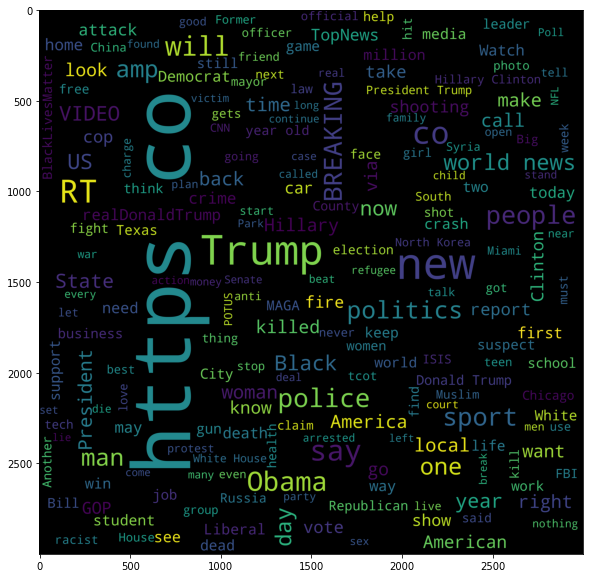

In [ ]:
spam_words= ' '.join(list(dataset[dataset['Type']=='Spam']['Tweet']))
spam_wc= WordCloud(width=3000,height=3000).generate(spam_words)
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

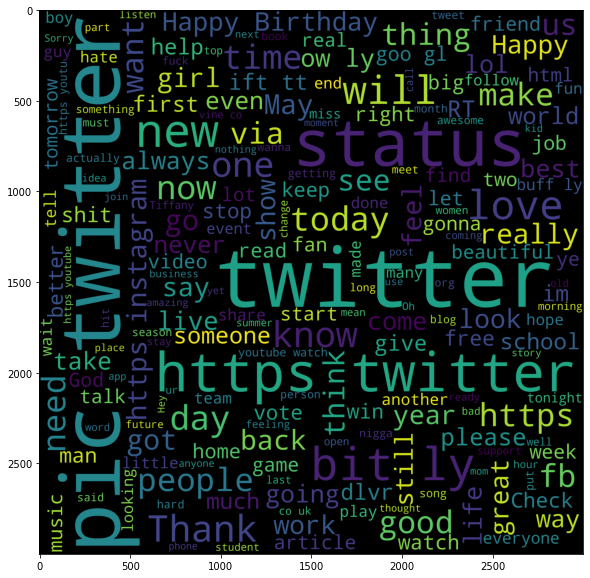

In [ ]:
Quality_words= ' '.join(list(dataset[dataset['Type']=='Quality']['Tweet']))
Quality_wc= WordCloud(width=3000,height=3000).generate(Quality_words)
plt.figure(figsize=(10,10))
plt.imshow(Quality_wc)
plt.show()

**Preproccing for the data**

In [ ]:
#put 1 if spam and if quality 0
dataset['Type']=dataset['Type'].apply(lambda x: 1 if x=='Spam' else 0)

In [ ]:
dataset.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,1487.0,0,Chicago,0
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,1487.0,0,Chicago,0
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,1487.0,0,"Scotland, U.K",0
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0,"Atlanta, Ga",1
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0,Blumberg,1


In [ ]:
def transform_tweet(tweet):
  #convert the tweet to lower case
    tweet = tweet.lower() 
  #remove the most used word(a,an,the etc...)
    tweet = nltk.word_tokenize(tweet)
    stop_words = True
    words = []
    for i in tweet:
      # returns True if all characters in the string are alphanumeric (either alphabets or numbers)
        if i.isalnum():
            words.append(i)
    tweet = words[:]
    words.clear()
    for i in tweet:
      #check the char is in english
        if i not in stopwords.words('english'):
            words.append(i)      
    tweet = words[:]
    words.clear()
    for i in tweet:
      #return the word to its infinitive 
        words.append(ps.stem(i))       
    return " ".join(words)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

ps = PorterStemmer()
dataset['Transformed_tweet'] = dataset['Tweet'] .apply(transform_tweet)



In [ ]:
dataset.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type,Transformed_tweet
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,1487.0,0,Chicago,0,everyth els complic pesummit
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,1487.0,0,Chicago,0,eren sent glare toward mikasa nod stood go hel...
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,1487.0,0,"Scotland, U.K",0,post new photo facebook http
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0,"Atlanta, Ga",1,jan idiot chelsea handler diagnos trump diseas...
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0,Blumberg,1,pedophil anthoni weiner terrifi get beaten pri...


**Divide the data to test and train**

In [ ]:
 #used to transform a given text into a vector on the basis of the frequency (count) of each word
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4002)
X = tfidf.fit_transform(dataset['Transformed_tweet']).toarray()
X.shape
z= np.column_stack((X,dataset[["is_retweet"]].values))
y = dataset['Type'].values
#divide data with 25% test and 75 train
X_train,X_test,y_train,y_test = train_test_split(z,y,test_size=0.25,random_state=2)

**Start our model**

In [ ]:
#Types of Naive Baise algorithms
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
#takes the training data as arguments
gnb.fit(X_train,y_train)
#to predict the Types of the data values
y_predict1 = gnb.predict(X_test)
#print accuracy and matrix and the percision
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))



0.7516733601070951
[[1297  219]
 [ 523  949]]
0.8125


In [ ]:
#takes the training data as arguments
mnb.fit(X_train,y_train)
#to predict the Types of the data values
y_predict2 = mnb.predict(X_test)
#print accuracy and matrix and the percision
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.8681392235609103
[[1297  219]
 [ 175 1297]]
0.8555408970976254


In [ ]:
#takes the training data as arguments
bnb.fit(X_train,y_train)
#to predict the Types of the data values
y_predict3 = bnb.predict(X_test)
#print accuracy and matrix and the percision
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.8728246318607764
[[1383  133]
 [ 247 1225]]
0.9020618556701031


**After that we choose the one with the Best result which is (bnb)**

**Now Start to build our model by choose the best algorithms**

In [ ]:
X_train.shape

(8964, 4003)

In [ ]:
#we choose three algorithms (bnb(Naive Bais), dicition tree,Gradient Boosting Decision Tree,Nuaral Networks)
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='adam', alpha=0.001,hidden_layer_sizes=(7, 100), random_state=1)
bnb =  BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=8963)
gbdt = GradientBoostingClassifier(n_estimators=100,random_state=5)

In [ ]:
#the models
models = { 
    'Naive Baise': bnb, 
    'Decision Tress': dtc, 
    'Gradient Boosting Decision Tree':gbdt,
    'Nuaral Network':nn,
}

In [ ]:
#calculate the accuracy and percision for each model
def train_classifier(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []
for name,model in models.items():
    current_accuracy,current_precision = train_classifier(model, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Naive Baise
Accuracy -  0.8728246318607764
Precision -  0.9020618556701031
For  Decision Tress
Accuracy -  0.8363453815261044
Precision -  0.8498220640569395
For  Gradient Boosting Decision Tree
Accuracy -  0.8360107095046854
Precision -  0.8472418670438473
For  Nuaral Network
Accuracy -  0.8319946452476573
Precision -  0.8335625859697386


In [ ]:
performance_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df



,Algorithm,Accuracy,Precision
0,Naive Baise,0.872825,0.902062
1,Decision Tress,0.836345,0.849822
2,Gradient Boosting Decision Tree,0.836011,0.847242
3,Nuaral Network,0.831995,0.833563


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,Naive Baise,Accuracy,0.872825
1,Decision Tress,Accuracy,0.836345
2,Gradient Boosting Decision Tree,Accuracy,0.836011
3,Nuaral Network,Accuracy,0.831995
4,Naive Baise,Precision,0.902062
5,Decision Tress,Precision,0.849822
6,Gradient Boosting Decision Tree,Precision,0.847242
7,Nuaral Network,Precision,0.833563


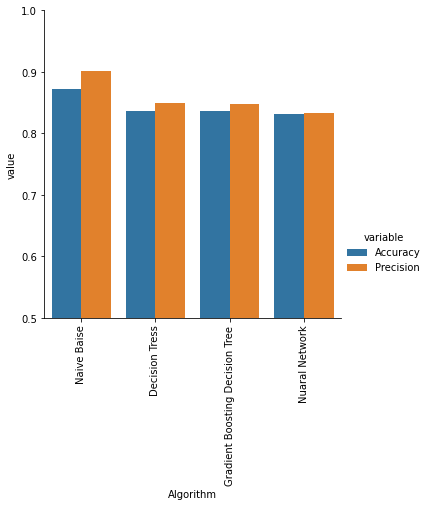

In [ ]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Applying stacking
estimators=[('dtc', dtc), ('bnb', bnb), ('gbdt', gbdt)]
final_estimator= RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8801874163319946
Precision 0.8783967391304348


In [ ]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))